In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Here We are using the cleaned data we already did in assignment 3

In [2]:
data = pd.read_csv("cleaned.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  889 non-null    int64  
 1   survived    889 non-null    int64  
 2   pclass      889 non-null    int64  
 3   sex         889 non-null    object 
 4   age         889 non-null    float64
 5   sibsp       889 non-null    int64  
 6   parch       889 non-null    int64  
 7   fare        889 non-null    float64
 8   embarked    889 non-null    object 
 9   class       889 non-null    object 
 10  who         889 non-null    object 
 11  adult_male  889 non-null    bool   
 12  alive       889 non-null    object 
 13  alone       889 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 85.2+ KB


#### We will now process this dataset on the further questions

# 1. Handle categorical variables with numerically coded values

In [4]:
data.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
X = data.iloc[:,[2,3,8,9,10,12]].values # here we are storing all catagorical data in X
y = data.iloc[:, -2].values # here we are storing the values that are to be predicted

In [7]:
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0]) # through this we will replace much of catagorical data to the numerical form
X[:,1] = labelencoder_X.fit_transform(X[:,1])

In [8]:
X

array([[2, 1, 'S', 'Third', 'man', 'no'],
       [0, 0, 'C', 'First', 'woman', 'yes'],
       [2, 0, 'S', 'Third', 'woman', 'yes'],
       ...,
       [2, 0, 'S', 'Third', 'woman', 'no'],
       [0, 1, 'C', 'First', 'man', 'yes'],
       [2, 1, 'Q', 'Third', 'man', 'no']], dtype=object)

#### here we can see that male is assigned as 1 and female as 0 similarly all catagorical data is converted into some other data

In [9]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [10]:
X  

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

#### Here we distributed every column with different values in separate columns

In [11]:
# Encoding the dependent vector y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 

# Perform univariate and bivariate analysis and derive meaningful insights about the dataset

In [12]:
def analyse(dataframe,x=None, y=None,hue=None,verbose=True):
    if x == None:
        col_ins = y
    else:
        col_ins = x
    series = dataframe[col_ins]
    print(series.describe())
    if verbose:
        print(series.value_counts())
    sns.countplot(x=x, y=y, hue=hue, data=dataframe)
    plt.show()

### Univariate Analysis

count    889.000000
mean       0.382452
std        0.486260
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64
0    549
1    340
Name: survived, dtype: int64


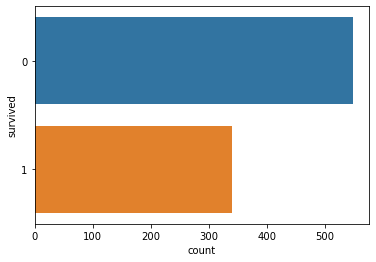

In [13]:
idx = ['tab:blue', 'tab:orange']
analyse(data, y = 'survived')

count      889
unique       2
top       male
freq       577
Name: sex, dtype: object
male      577
female    312
Name: sex, dtype: int64


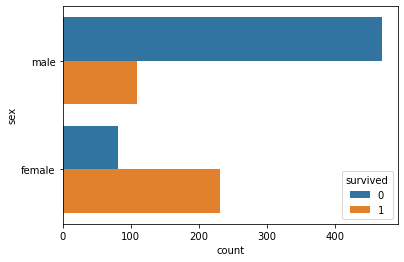

In [14]:
analyse(data, y = 'sex', hue='survived')

# 3.Identify and treat missing values and remove dataset outliers

In [15]:
#Identifying and treatment of missing values has been already performed in the assignment

In [16]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
   
        
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   


Outliers_to_drop = detect_outliers(data,2,["age","sibsp","parch","fare"])

In [17]:
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [18]:
data

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,no,False
1,1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,yes,False
2,2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,yes,True
3,3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,yes,False
4,4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,no,True
860,887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,yes,True
861,888,0,3,female,29.642093,1,2,23.4500,S,Third,woman,False,no,False
862,889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,yes,True


# 4.Build a correlation matrix to identify relevant variables ( Graph )

In [19]:
cor = data.corr()
cor

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,adult_male,alone
Unnamed: 0,1.000000,-0.006787,-0.036008,0.006747,-0.059634,0.007264,0.032143,0.037386,0.054482
survived,-0.006787,1.000000,-0.329670,-0.093717,0.032897,0.109136,0.271161,-0.570971,-0.224262
pclass,-0.036008,-0.329670,1.000000,-0.320422,0.044240,0.032690,-0.546755,0.096154,0.136177
age,0.006747,-0.093717,-0.320422,1.000000,-0.248386,-0.186322,0.088900,0.242655,0.179917
sibsp,-0.059634,0.032897,0.044240,-0.248386,1.000000,0.365293,0.113721,-0.302445,-0.663909
parch,0.007264,0.109136,0.032690,-0.186322,0.365293,1.000000,0.146178,-0.358204,-0.563898
fare,0.032143,0.271161,-0.546755,0.088900,0.113721,0.146178,1.000000,-0.180671,-0.244622
adult_male,0.037386,-0.570971,0.096154,0.242655,-0.302445,-0.358204,-0.180671,1.000000,0.406089
alone,0.054482,-0.224262,0.136177,0.179917,-0.663909,-0.563898,-0.244622,0.406089,1.000000


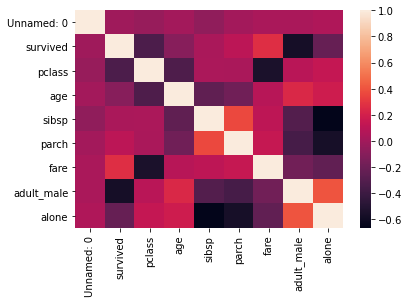

In [20]:
sns.heatmap(cor)

### Here we come to know that survival is more correlated to PClass , fare ,  Adult Male  and  Alone